# Unid-pulsar analysis (DR3)

read summary file `files/dr3_classification.csv` 
Loaded Fermi 4FGL gll_psc_dr3.fit: 6659 entries


[Unid-pulsar analysis Confluence page](https://confluence.slac.stanford.edu/display/SCIGRPS/Unid+analysis)

<h5 style="text-align:right; margin-right:15px"> 2023-12-14 15:06</h5>

This section examines the properties of the "unid-pulsar" sources, the unassociated sources predicted to be pulsars.

There clearly must be young pulsars (`psr`) and MSPs (`msp`) in this set. The point of this section is to compare the properties,
estimate how many of each there are, and discuss how the remainder are unique.

We add the diffuse energy flux background discussed in the Diffuse Background section to the three spectral features, and
start with a "corner" plot showing the four distributions and correlations.

###  Corner plot for spectral properties and diffuse
 In Figure 3.1 we show distributions of the four features for each
of the three source types.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f16adeb3040>
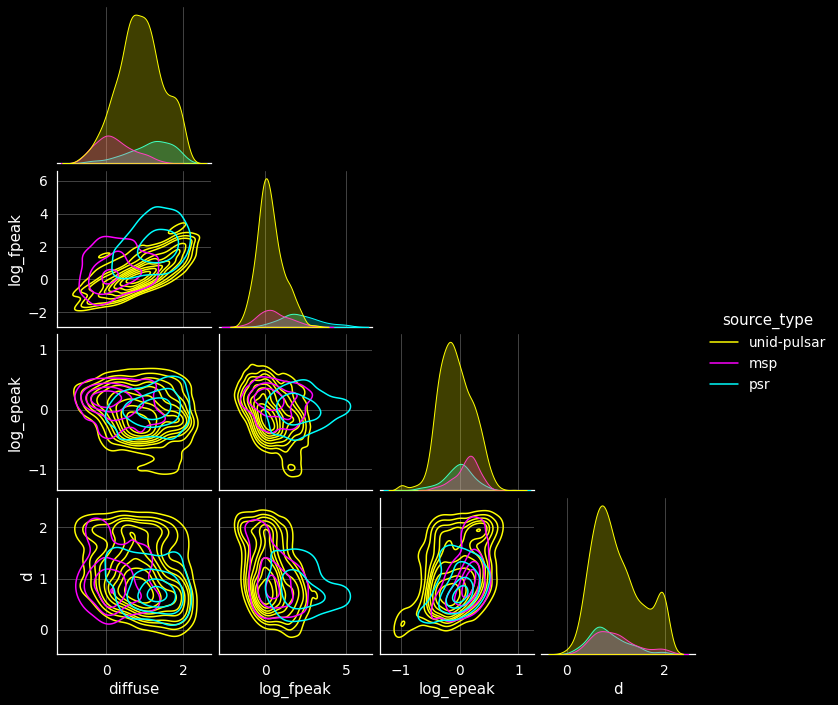

The first and last pairs, the flux and spectral shape variable, correlations,
are particularly interesting. Here we expand them with a scatter plot for the
unid-pulsar` sources.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f16adee2830>
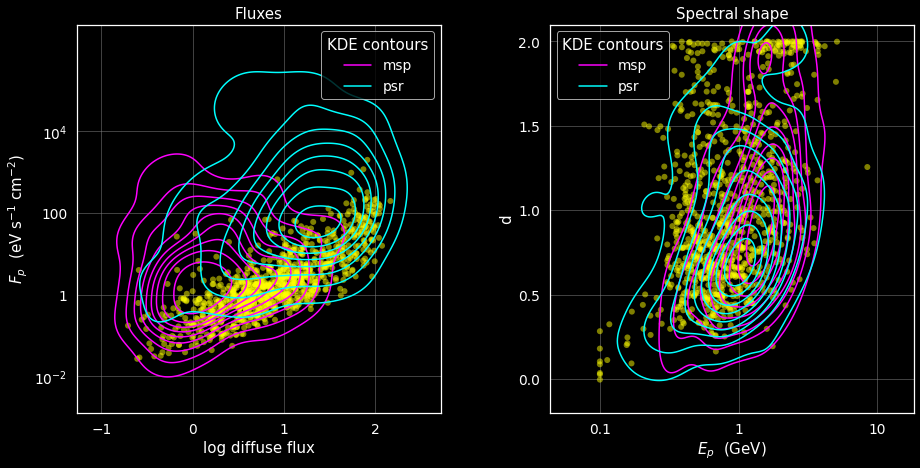

## Apply KDE  

Calculate KDE for the pulsar types ['psr', 'msp'], using the ['diffuse', 'log_fpeak', 'log_epeak', 'd'] features,
then apply normalized value to all sources, adding columns with "_kde" appended.

### KDE scatter plots
In Figure 3.3 we show scatter plots of the two KDE values for actual pulsars in the upper row,
and the three most numerous pulsar predictions in the lower row.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f16ae1b24d0>
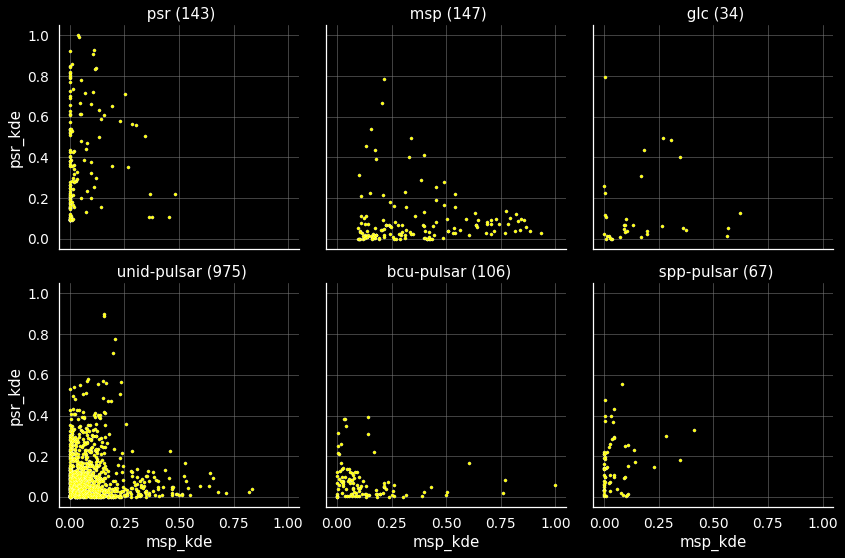

The upper row, with the three actual pulsar classes, shows that 
separation for the `psr` and `msp` class is good, while `glc` shows an
apparent mixture. 

Now we examine the KDE values for the largest pulsar predictions.

## Use KDE values to select non-pulsars
Figure 3.4 shows the KDE values for the `unid-pulsar` sources,
as well as the `msp` and `psr` sources from which the KDE's were derived.
Also shown are two rectangular regions used to select a subset of the 
`unid-pulsar` sources that are less likely to be actual undetected pulsars.
We refer to theses as "mystery" sources below.  

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f16aa55d960>
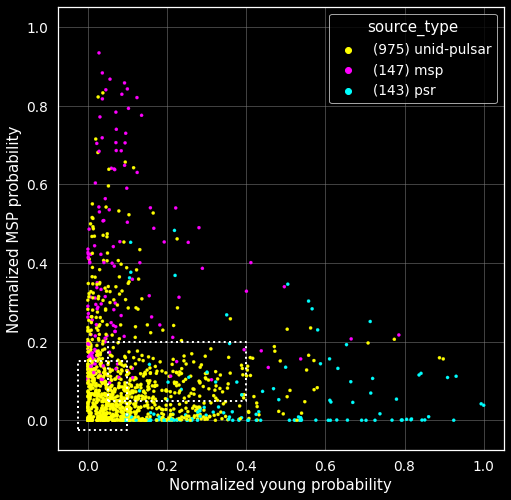

Selected in regions shown

,unid-pulsar,msp,psr
total,975,147,143
selected,631,30,23


## Spectral Curvature  
The spectral curvature $d$ appears to be a defining characteristic of the mystery sources, 
with a distribution extending to higher curvatures than that for the known pulsars. 
As was shown in 3PC, the value of 4/3, the maximum allowed for curvature radiation,
is consistent with an upper limit. However, these sources 
are weaker, with larger uncertainties. Thus in Figure 3.5 we compare uncertainty
vs. the curvature values for the mystery sources on the left, and the known pulsars on the
right. 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f16aa34b370>
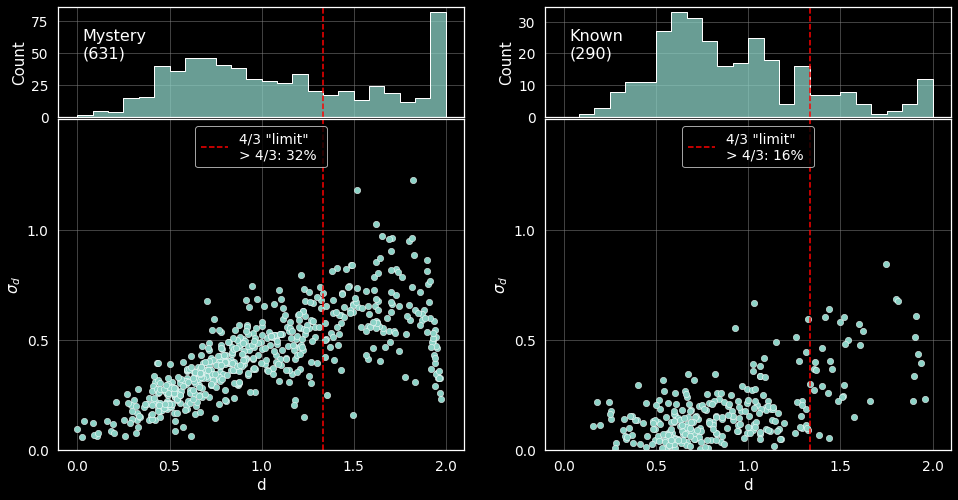

The spectral fitting procedure imposed an upper limit of 2&mdash;its effect on the value and 
uncertainty is apparent. Accounting for that, few if any are more that one sigma from that
value, but the large fraction of the mystery sources in that region strongly hints that
the underlying distribution does extend beyond 4/3.

---

In [1]:
%run pylib/unid_analysis dr3 unid-doc dark

In [2]:
outfile = f'files/unid-mystery-{dataset}.csv'
self.mystery_df.to_csv(outfile, float_format='%.3f')
show(f"""* Wrote {len(self.mystery_df)} mystery sources to `{outfile}`""")

* Wrote 631 mystery sources to `files/unid-mystery-dr3.csv`

In [3]:
selection='source_type=="unid-pulsar" & msp_kde>0.4 & significance>10'
show(f"""---
## Chose top MSP candidates for Einstein at home
{selection=}""")

t=self.df.query(selection)
msp_for_colin= t['glon glat significance r95 Ep Fp d'.split()].copy()
msp_file = 'files/msp_for_colin.csv'

show(f"""### Retrieve uw1410 positions...
... And check for DR4 association""")

from wtlike.interface import *
if dark_mode: plt.style.use('dark_background') 

dfi = get_fermi_info(msp_for_colin.index)
keep = dfi.dr_class1.values ==''
msp_for_colin['uw_ra'] = dfi.uw_pos.apply(lambda p: p.ra.deg) 
msp_for_colin['uw_dec'] = dfi.uw_pos.apply(lambda p: p.dec.deg) 
msp_for_colin['uw_r95'] = dfi.uw_r95
msp_for_colin.sort_values('significance', ascending=False)

---
## Chose top MSP candidates for Einstein at home
selection='source_type=="unid-pulsar" & msp_kde>0.4 & significance>10'

### Retrieve uw1410 positions...
... And check for DR4 association

,glon,glat,significance,r95,Ep,Fp,d,uw_ra,uw_dec,uw_r95
4FGL-DR3,,,,,,,,,,
4FGL J0953.6-1509,251.903,29.603,31.646,0.035,1.741,4.030,1.310,148.414,-15.152,0.026
4FGL J0237.8+5238,138.827,-6.920,25.856,0.030,1.760,3.510,1.065,39.474,52.641,0.025
4FGL J2133.1-6432,328.748,-41.289,24.917,0.044,1.229,1.827,1.175,323.274,-64.529,0.036
4FGL J0758.8-1450,233.956,7.613,23.507,0.037,1.724,3.036,1.119,119.702,-14.827,0.029
4FGL J1730.4-0359,19.738,15.995,20.800,0.037,1.501,4.391,1.006,262.621,-3.991,0.030
4FGL J1400.0-2415,322.353,36.004,19.942,0.051,2.157,1.052,1.236,210.029,-24.272,0.033
4FGL J1831.1-6503,329.934,-22.349,19.719,0.036,1.765,0.772,0.900,277.735,-65.055,0.031
4FGL J2043.9-4802,351.629,-38.284,19.258,0.040,1.796,0.810,1.150,310.975,-48.043,0.035
4FGL J1720.6+0708,28.942,23.419,19.050,0.056,0.905,2.347,0.807,260.178,7.173,0.043


In [4]:
msp_for_colin.loc[keep].to_csv(msp_file, float_format='%.3f')
show(f"""* Wrote {sum(keep)} to `{msp_file}`""")

* Wrote 28 to `files/msp_for_colin.csv`

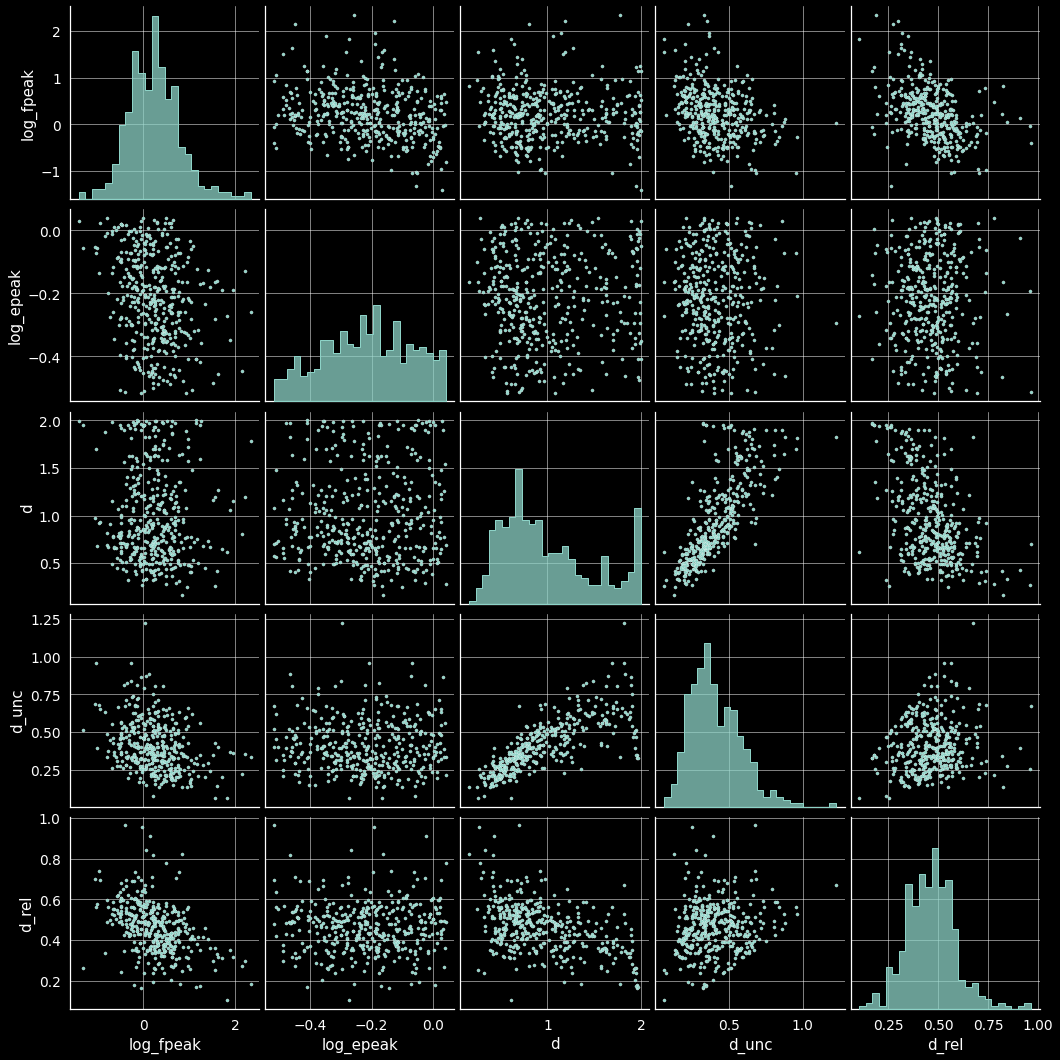

In [5]:
df = self.mystery_df.query('0.3<Ep<1.1').copy()
df['d_rel'] = (df.d_unc/df.d).clip(0,1)
sns.pairplot(df, vars='log_fpeak log_epeak d d_unc d_rel'.split(), height=3, 
             plot_kws=dict(s=10), diag_kws=dict(bins=26,element='step'));